## Importing Libraries

In [596]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Import Cleaned Dataset after EDA

In [598]:
df = pd.read_csv('clean_surfaces.csv', index_col=0)

In [599]:
df.head()

,fxx,fyy,fxy,D,Result,Equation_(a*x**2 + b*y**2)/(x**2 + y**2 + 1),Equation_a*cos(x) + b*sin(y),Equation_a*exp(-x**2 - y**2),Equation_a*log(x**2 + 1) + b*y**2,Equation_a*sin(x) + b*y**2,Equation_a*x**2 + b*y**2,Equation_a*x**2 + b*y**2 + c*x*y,Equation_a*x**4 + b*y**2
0,-94,64,0,-6016.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-78,-86,0,6708.0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-76,88,0,-6688.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,74,-96,0,-7104.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-82,32,0,-2624.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [600]:
X = df[['fxx', 'fyy', 'fxy', 'D']]
y = df['Result']

In [601]:
y.value_counts()

Result
1    232
2    159
3    132
0     77
Name: count, dtype: int64

## Train Test Split

In [603]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=33)

## SMOTE to balance the dataset

In [605]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=33)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [606]:
y_train.value_counts()

Result
1    155
2    155
3    155
0    155
Name: count, dtype: int64

## Decision Tree Classifier

In [608]:
from sklearn.tree import DecisionTreeClassifier
treeClassifier = DecisionTreeClassifier()
treeClassifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [609]:
param = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [610]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(treeClassifier, param_grid=param, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best']},
             scoring='accuracy')

In [611]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [612]:
grid.best_score_

0.9983870967741936

In [613]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = grid.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 1.0


Confusion Matrix:
[[25  0  0  0]
 [ 0 77  0  0]
 [ 0  0 52  0]
 [ 0  0  0 44]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        77
           2       1.00      1.00      1.00        52
           3       1.00      1.00      1.00        44

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198



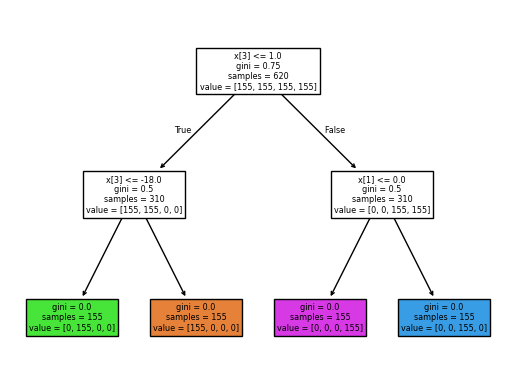

In [614]:
from sklearn import tree
tree.plot_tree(treeClassifier, filled=True)
plt.show()